In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("Downloads/insurance.csv")
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Univariate Analysis

In [6]:
#to see the number of rows and columns
df.shape

(1338, 7)

In [7]:
# the columns in the dataset
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
#to find the number of quantity in each category
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

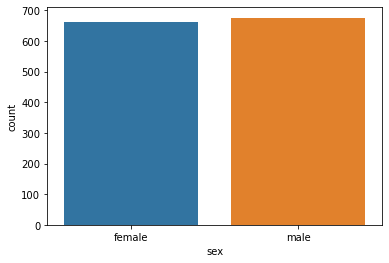

In [9]:
#plotting a countplot
sns.countplot(x='sex',data=df)
plt.show()

In [10]:
#To Check the diffrent ages present in the age column
df['age'].nunique()

47

In [11]:
df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

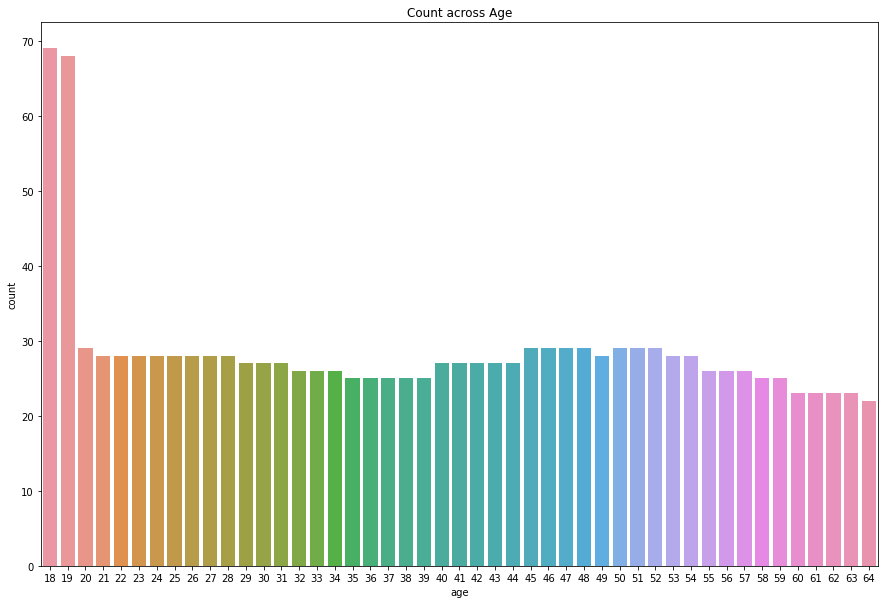

In [12]:
#plotting countplot for the age feature
plt.figure(figsize=(15,10))
sns.countplot(df['age'])
plt.title('Count across Age')
plt.show()

In [13]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [14]:
df['bmi'].nunique()

548

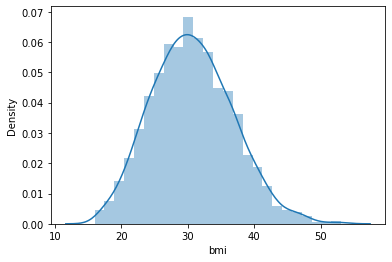

In [15]:
sns.distplot(df['bmi'])
plt.show()

In [16]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

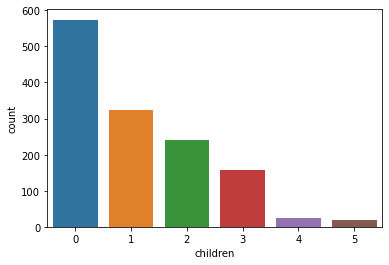

In [18]:
#plotting countplot
sns.countplot(df['children'])
plt.show()

In [19]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

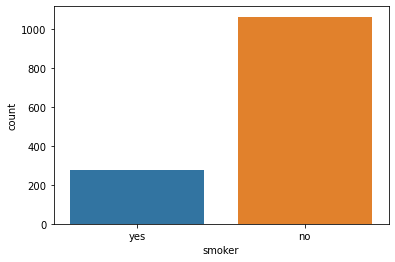

In [20]:
sns.countplot(df['smoker'])
plt.show()

In [21]:
r=df['region'].value_counts()

In [22]:
r

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

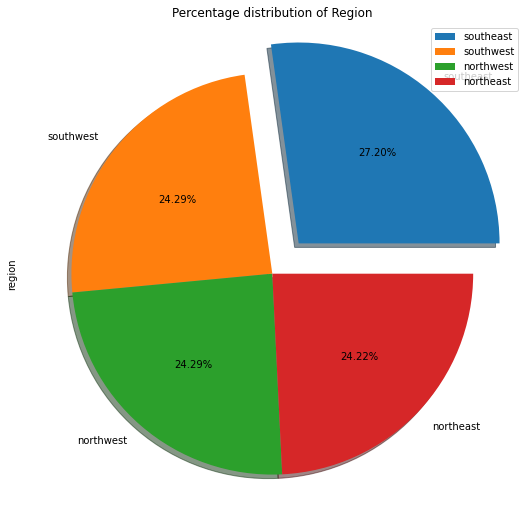

In [23]:
#plotting pie chart of the region feature
plt.figure(figsize=(9,9.5))
df['region'].value_counts().plot(kind='pie',explode=[0.2,0,0,0],legend=True,autopct='%.2f%%',shadow=True)
plt.title('Percentage distribution of Region')
plt.show()

In [24]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [25]:
len(df['charges'].value_counts())

1337

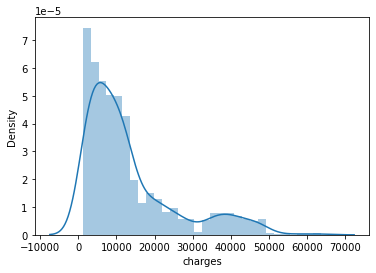

In [26]:
#plotting a distributionplot for the target variable charges
sns.distplot(df['charges'])
plt.show()

Bivariate Analysis and Multivariate Analysis

Smoker with Sex

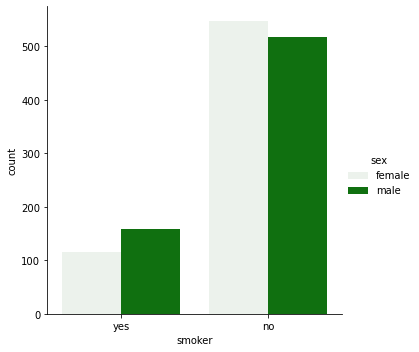

In [27]:
#plotting a categorical plot with smoker feature and sex
sns.catplot(data=df,x='smoker',kind='count',hue='sex',color='green')
plt.show()

Charges with Smoker

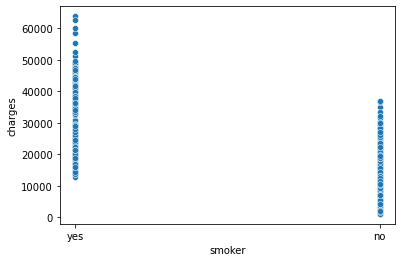

In [28]:
#plotting scatter  plot for charges with smoker
sns.scatterplot(y='charges',x='smoker',data=df)
plt.show()

Distribution Plot for Age column

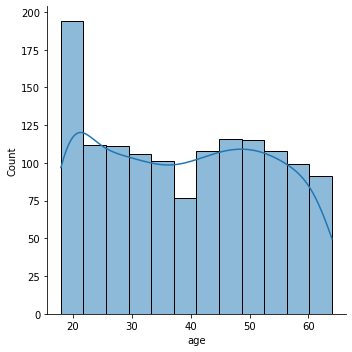

In [29]:
sns.displot(df.age.dropna(axis=0),kde=True)
plt.show()

In [30]:
print("Sex: \n",df['sex'].value_counts())
print("Smoker: \n",df['smoker'].value_counts())
print("Region: \n",df['region'].value_counts())

Sex: 
 male      676
female    662
Name: sex, dtype: int64
Smoker: 
 no     1064
yes     274
Name: smoker, dtype: int64
Region: 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [31]:
df2 = pd.get_dummies(df)
print(df2.dtypes)
print(df2.columns)

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object
Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


Skewness: 1.515880
Kurtosis: 1.606299


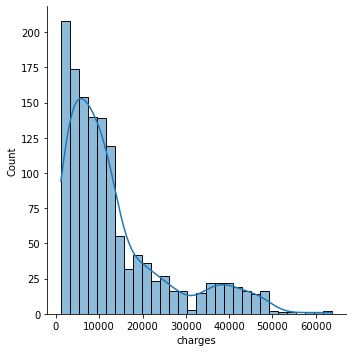

In [32]:
ax = sns.displot((df2['charges']), kde = True)
print("Skewness: %f" % df2['charges'].skew())
print("Kurtosis: %f" % df2['charges'].kurt())

Skewness: 0.055673
Kurtosis: -1.245088


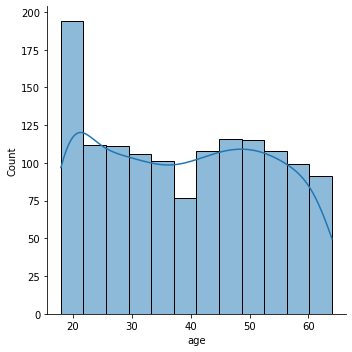

In [33]:
ax = sns.displot((df2['age']), kde = True)
print("Skewness: %f" % df2['age'].skew())
print("Kurtosis: %f" % df2['age'].kurt())

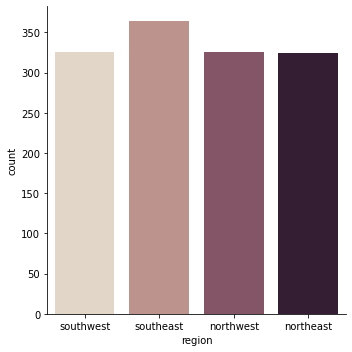

In [34]:
sns.catplot(x= 'region', kind="count", palette="ch:.25", data=df)

Text(0.5, 1.0, 'Cost for smoker/no smoker')

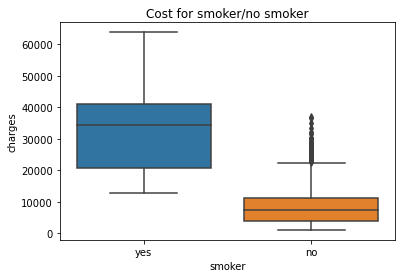

In [35]:
ax = sns.boxplot(x='smoker',y='charges', data = df)
plt.title('Cost for smoker/no smoker')

In [36]:
df2['overweight'] = (df2.bmi >= 30).astype(int)
df2['unhealthy'] = df2.smoker_yes * df2.overweight

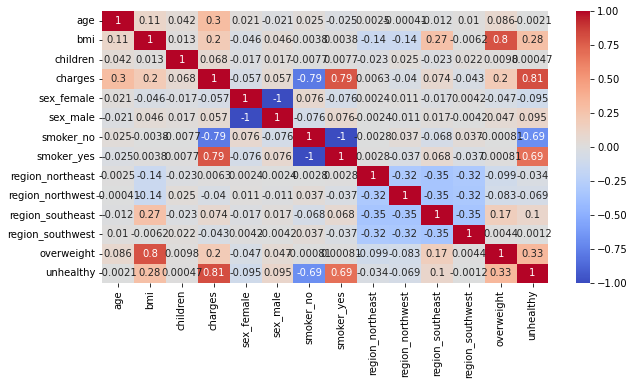

In [37]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.heatmap(df2.corr(), cmap = 'coolwarm', annot = True)

plt.show()

In [38]:
df2.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'overweight', 'unhealthy'],
      dtype='object')

In [39]:
x = df2[['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'overweight', 'unhealthy']]
y = df2[['charges']]

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [41]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lr = LinearRegression()

rfe = RFE(estimator=lr, n_features_to_select = 11, step= 1)
rfe = rfe.fit(x_train, y_train)
print(rfe.support_)

print(df2.columns[1:][rfe.support_])

[ True False  True  True  True  True  True  True  True False  True  True
  True]
Index(['bmi', 'charges', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southwest',
       'overweight', 'unhealthy'],
      dtype='object')


In [42]:
max_threshold = df2['charges'].quantile(0.99)
max_threshold

48537.480726

In [43]:
df2[df2['charges']>max_threshold]

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,overweight,unhealthy
34,28,36.400,1,51194.55914,0,1,0,1,0,0,0,1,1,1
175,63,37.700,0,48824.45000,1,0,0,1,0,0,0,1,1,1
281,54,40.565,3,48549.17835,0,1,0,1,1,0,0,0,1,1
488,44,38.060,0,48885.13561,1,0,0,1,0,0,1,0,1,1
530,57,42.130,1,48675.51770,0,1,0,1,0,0,1,0,1,1
543,54,47.410,0,63770.42801,1,0,0,1,0,0,1,0,1,1
577,31,38.095,1,58571.07448,1,0,0,1,1,0,0,0,1,1
819,33,35.530,0,55135.40209,1,0,0,1,0,1,0,0,1,1
901,60,40.920,0,48673.55880,0,1,0,1,0,0,1,0,1,1
1062,59,41.140,1,48970.24760,0,1,0,1,0,0,1,0,1,1


In [44]:
min_threshold = df2['charges'].quantile(0.01)
min_threshold

1252.97273

In [45]:
df2[df2['charges']<min_threshold]

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,overweight,unhealthy
22,18,34.10,0,1137.0110,0,1,1,0,0,0,1,0,1,0
194,18,34.43,0,1137.4697,0,1,1,0,0,0,1,0,1,0
442,18,43.01,0,1149.3959,0,1,1,0,0,0,1,0,1,0
584,19,20.70,0,1242.8160,0,1,1,0,0,0,0,1,0,0
663,18,33.66,0,1136.3994,0,1,1,0,0,0,1,0,1,0
681,19,20.30,0,1242.2600,0,1,1,0,0,0,0,1,0,0
781,18,41.14,0,1146.7966,0,1,1,0,0,0,1,0,1,0
791,19,27.60,0,1252.4070,0,1,1,0,0,0,0,1,0,0
808,18,30.14,0,1131.5066,0,1,1,0,0,0,1,0,1,0
866,18,37.29,0,1141.4451,0,1,1,0,0,0,1,0,1,0


In [46]:
x = df2[['age', 'children', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southwest',
       'overweight', 'unhealthy']]
y = df2[['charges']]

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

            feature       VIF
0               age  4.439841
1          children  1.761728
2        smoker_yes  2.550559
3  region_northeast  1.636902
4  region_northwest  1.646489
5  region_southwest  1.644448
6        overweight  2.466806
7         unhealthy  2.631851


In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [49]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
rf_Model = RandomForestRegressor()
print("Random Forest regression score: ", np.round(np.mean(cross_val_score(rf_Model, x_train, y_train.values.ravel(), cv = 5, scoring = "r2")), 5)) 

Random Forest regression score:  0.7985


In [50]:
param_grid = {'n_estimators': [int(x) for x in np.linspace(50, 100, num = 3)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [2, 4, 8],
               'min_samples_split': [2, 5,10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
print(param_grid)

{'n_estimators': [50, 75, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 8], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf_Model = RandomForestRegressor()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 5, verbose=0, n_jobs = 4)
rf_Grid.fit(x_train, y_train.values.ravel())
print(rf_Grid.best_params_)
print("Random Forest regression with hyperparameter tuning best score: ", np.round(rf_Grid.best_score_, 5))
print("Random Forest regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(rf_Model, x_train, y_train.values.ravel(), cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(rf_Grid.best_score_, 5))) * 100, 5)))

{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 75}
Random Forest regression with hyperparameter tuning best score:  0.84384
Random Forest regression improvement after hyperparameter tuning: 5.28536%


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
print("Gradient Booster regression score: ", np.round(np.mean(cross_val_score(gbr, x_train, y_train.values.ravel(), cv = 5, scoring = "r2")), 5)) 

Gradient Booster regression score:  0.84203


In [53]:
param_grid = {'n_estimators': [530, 535, 540],
               'learning_rate': [0.005, 0.01, 0.02],
               'max_depth': [1, 2, 4, 8],
               'subsample': [0.630, 0.635, 0.640]}
print(param_grid)

{'n_estimators': [530, 535, 540], 'learning_rate': [0.005, 0.01, 0.02], 'max_depth': [1, 2, 4, 8], 'subsample': [0.63, 0.635, 0.64]}


In [54]:
model = GradientBoostingRegressor()
grid_gbr = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose=0, n_jobs = 4)
grid_gbr.fit(x_train, y_train.values.ravel())
print(grid_gbr.best_params_)
print("Gradient Booster regression with hyperparameter tuning best score: ", np.round(grid_gbr.best_score_, 5))
print("Gradient Booster regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(gbr, x_train, y_train.values.ravel(), cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(grid_gbr.best_score_, 5))) * 100, 5)))

{'learning_rate': 0.02, 'max_depth': 1, 'n_estimators': 530, 'subsample': 0.63}
Gradient Booster regression with hyperparameter tuning best score:  0.85036
Gradient Booster regression improvement after hyperparameter tuning: 0.97959%


In [56]:
from xgboost import XGBRegressor
model = XGBRegressor()
np.mean(cross_val_score(model, x_train, y_train, cv = 5, scoring = "r2"))  

0.7543833965334883

In [57]:
param_grid = {'n_estimators': [390, 400, 410],
               'learning_rate': [0.02, 0.021, 0.022],
               'max_depth': [2, 4, 8],
               'colsample_bytree': [0.5,0.75, 1],
               'subsample': [0.7,0.8, 0.9],
            'tree_method': ["hist"] }
print(param_grid)

{'n_estimators': [390, 400, 410], 'learning_rate': [0.02, 0.021, 0.022], 'max_depth': [2, 4, 8], 'colsample_bytree': [0.5, 0.75, 1], 'subsample': [0.7, 0.8, 0.9], 'tree_method': ['hist']}


In [60]:

grid_xgb = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose=0, n_jobs = 4)
grid_xgb.fit(x_train, y_train)
print(grid_xgb.best_params_)
print("XGBoost regression with hyperparameter tuning best score: ", np.round(grid_xgb.best_score_, 5))
print("XGBoost Forest regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(model,x_train, y_train, cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(grid_xgb.best_score_, 5))) * 100, 5)))

{'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 390, 'subsample': 0.7, 'tree_method': 'hist'}
XGBoost regression with hyperparameter tuning best score:  0.85022
XGBoost Forest regression improvement after hyperparameter tuning: 11.27238%


In [61]:
from sklearn.metrics import r2_score
forest_yhat = rf_Grid.best_estimator_.predict(x_test)
xgb_yhat = grid_xgb.predict(x_test)
gbr_yhat = grid_gbr.predict(x_test)
print("Random forest regression accuracy: %.2f" % r2_score(y_test, forest_yhat) )
print("Gradient Booster regression accuracy: %.2f" % r2_score(y_test, gbr_yhat) )
print("XGBoost regression accuracy: %.2f" % r2_score(y_test, xgb_yhat) )


Random forest regression accuracy: 0.89
Gradient Booster regression accuracy: 0.90
XGBoost regression accuracy: 0.90


In [66]:
from sklearn.metrics import mean_squared_error
print("Random forest regression accuracy: %.2f" % mean_squared_error(y_test, forest_yhat) )
print("Gradient Booster regression accuracy: %.2f" % mean_squared_error(y_test, gbr_yhat) )
print("XGBoost regression accuracy: %.2f" % mean_squared_error(y_test, xgb_yhat) )

Random forest regression accuracy: 17558794.97
Gradient Booster regression accuracy: 16295911.22
XGBoost regression accuracy: 16497881.42


In [63]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [64]:
print(selection.feature_importances_)

[0.14424457 0.03235162 0.10211691 0.00758891 0.00788889 0.00702492
 0.00782048 0.69096369]


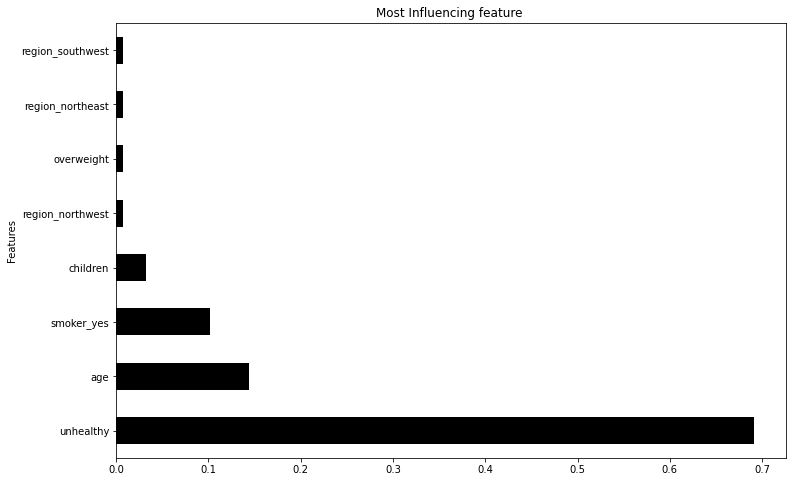

In [65]:
plt.figure(figsize = (12,8))
plt.title("Most Influencing feature ")
plt.ylabel('Features')
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh',color='black')
plt.show()